<a href="https://colab.research.google.com/github/panicia16/Data-Analysis/blob/main/EDA_Descriptive_Statistics_%26_Grouping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

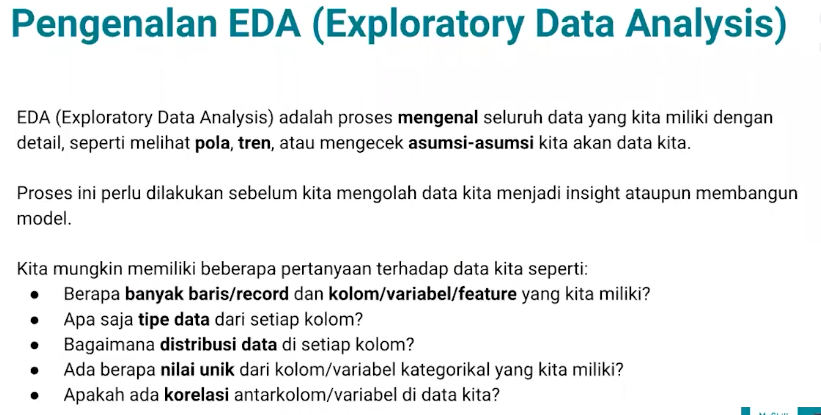

1. jumlah kolom mennetukan berapa feature, dan baris menentukan seberapa besar load data yg akan analaisis

2. mencari tau tipe data, sehingga bisa melakukan analisis sesuai sesuai tipe data tsb

3. mengetahui distribusi tiap kolom

4. mengetahui nilai unik

5. apakah kolom memiliki korelasi dgn satu kolom yg lain

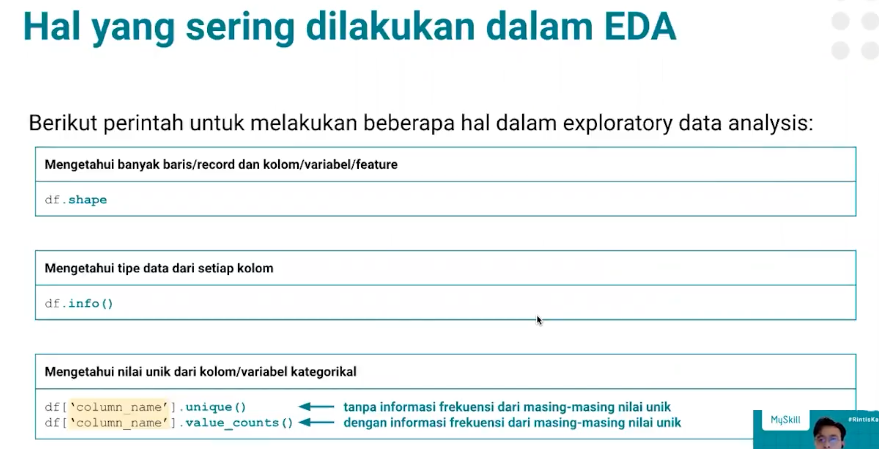


# Impor packages

In [ ]:
# pip install pandas
# pip install numpy
import pandas as pd
import numpy as np

In [ ]:
import os
os.getcwd()

'/content'

# Impor data dari CSV ke DataFrame

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MySkill/Online Retail Data.csv', header=0)
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


# Data cleansing

In [ ]:
df_clean = df.copy()
# menghapus semua baris tanpa product_name
df_clean = df_clean[~df_clean['product_name'].isna()]
# membuat semua product_name berhuruf kecil
df_clean['product_name'] = df_clean['product_name'].str.lower()
# menghapus semua baris dengan product_code atau product_name test
df_clean = df_clean[(~df_clean['product_code'].str.lower().str.contains('test')) |
                    (~df_clean['product_name'].str.contains('test '))]
# membuat kolom order_status dengan nilai 'cancelled' jika order_id diawali dengan huruf 'c' dan 'delivered' jika order_id tanpa awalan huruf 'c'
df_clean['order_status'] = np.where(df_clean['order_id'].str[:1]=='C', 'cancelled', 'delivered')
# mengubah nilai quantity yang negatif menjadi positif karena nilai negatif tersebut hanya menandakan order tersebut cancelled
df_clean['quantity'] = df_clean['quantity'].abs()
# menghapus baris dengan price bernilai negatif
df_clean = df_clean[df_clean['price']>0]
# membuat nilai amount, yaitu perkalian antara quantity dan price
df_clean['amount'] = df_clean['quantity'] * df_clean['price']
# mengganti product_name dari product_code yang memiliki beberapa product_name dengan salah satu product_name-nya yang paling sering muncul
most_freq_product_name = df_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df_clean['product_name'] = df_clean['most_freq_product_name']
df_clean = df_clean.drop(columns='most_freq_product_name')
# mengkonversi customer_id menjadi string
df_clean['customer_id'] = df_clean['customer_id'].astype(str)
df_clean = df_clean.reset_index(drop=True)
df_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,order_status,amount
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590.0,cancelled,4.25
1,493413,21724,panda and bunnies sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85
2,493413,84578,elephant toy with blue t-shirt,1,2010-01-04 09:54:00,3.75,nan,delivered,3.75
3,493413,21723,alphabet hearts sticker sheet,1,2010-01-04 09:54:00,0.85,nan,delivered,0.85
4,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590.0,delivered,91.80
...,...,...,...,...,...,...,...,...,...
458241,539991,21618,4 wildflower botanical candles,1,2010-12-23 16:49:00,1.25,nan,delivered,1.25
458242,539991,72741,grand chocolatecandle,4,2010-12-23 16:49:00,1.45,nan,delivered,5.80
458243,539992,21470,flower vine raffia food cover,1,2010-12-23 17:41:00,3.75,nan,delivered,3.75
458244,539992,22258,felt farm animal rabbit,1,2010-12-23 17:41:00,1.25,nan,delivered,1.25


# Hal yang sering dilakukan dalam EDA (Exploratory Data Analysis)

## Mengetahui banyak baris/record dan kolom/variabel/feature

In [ ]:
df_clean.shape

(458246, 9)

## Mengetahui tipe data dari setiap kolom

In [ ]:
df_clean.info()

# object = tipe data campuran, tapi biasanya berisi teks (string).
# Artinya: kalau kamu lihat kolom bertipe object, hampir pasti isinya adalah teks.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458246 entries, 0 to 458245
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      458246 non-null  object 
 1   product_code  458246 non-null  object 
 2   product_name  458246 non-null  object 
 3   quantity      458246 non-null  int64  
 4   order_date    458246 non-null  object 
 5   price         458246 non-null  float64
 6   customer_id   458246 non-null  object 
 7   order_status  458246 non-null  object 
 8   amount        458246 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 31.5+ MB


## Mengetahui nilai unik dari kolom/variabel kategorikal

In [ ]:
# tanpa informasi frekuensi dari masing-masing nilai unik
df_clean['order_status'].unique()

array(['cancelled', 'delivered'], dtype=object)

In [ ]:
# dengan informasi frekuensi dari masing-masing nilai unik
df_clean['product_code'].value_counts()

,count
product_code,
85123A,3194
22423,2085
85099B,1845
21212,1611
21232,1596
...,...
35001P,1
DCGS0075,1
85160b,1


In [ ]:
# dengan informasi frekuensi dari masing-masing nilai unik
df_clean['order_status'].value_counts()

# **PENGENALAN DESCRIPTIVE STATISTICS**

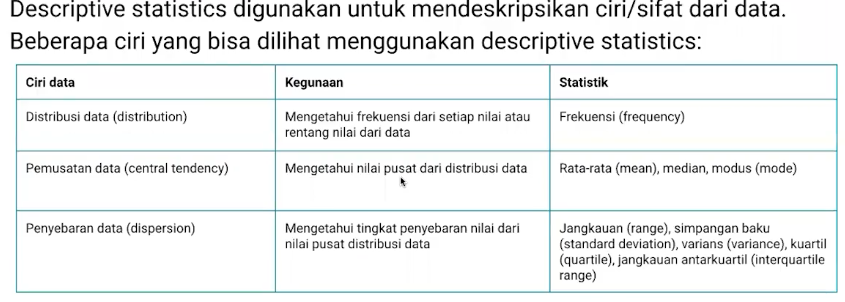

1. Distribusi data = cara bagaimana nilai-nilai data tersebar atau terbagi dalam suatu kumpulan data.

2. jangkauan = nilai tertinggi dan nilai terendah

3. simpangan baku = mengukur seberapa jauh data menyimpang dari rata - rata

4. varians = kuadrat dari simpangan baku. varinas ini menunjukkan tingkat penyebaran data, tapi dalam satuan kuadrat

5. kuartil = membagi data menjadi 4 bagian sama besar setelah diurutkan (Q1, Q2, Q3.....)

6. Jangkauan antar kuartil (interquartile range /iqr) = selisih antara kuartil atas (Q3) dengan kuartil bawah (Q1). menunjukkan penyebaran 50% data tengah (tanpa pengaruh outlier)


# Menghitung descriptive statistics dari DataFrame

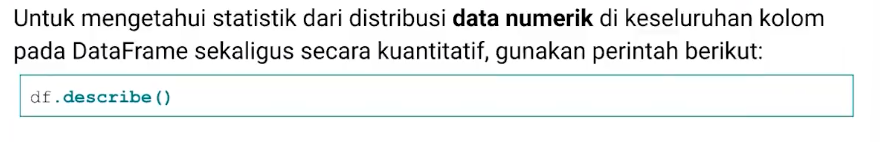

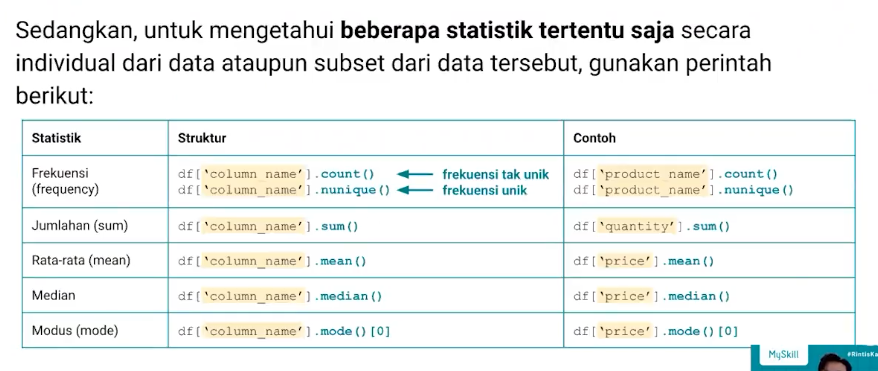

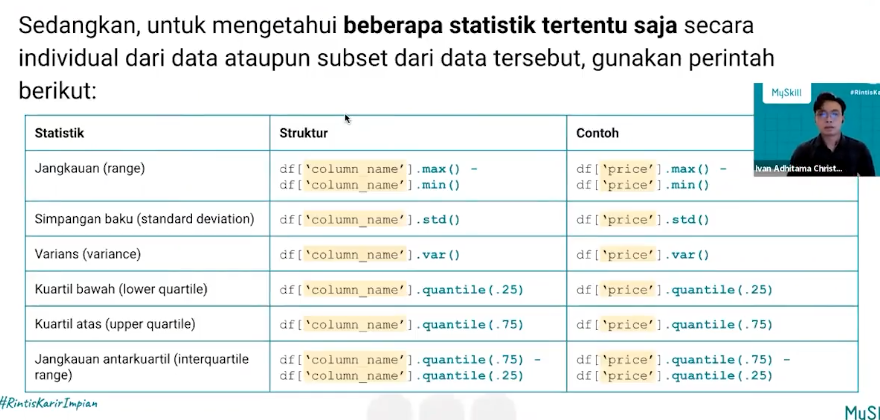

## Mengetahui statistik dari distribusi data numerik di keseluruhan kolom pada DataFrame sekaligus secara kuantitatif

In [ ]:
df_clean.describe()

#hanya 3 kolom, dikarenakan hanya 3 kolom ini saja yg numerik. hanya kolom numerik yg dapat disimpulkan

,quantity,price,amount
count,458246.000000,458246.000000,458246.000000
mean,10.004764,4.903037,19.512293
std,61.180755,99.536887,118.566258
min,1.000000,0.001000,0.001000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.100000,9.300000
75%,10.000000,4.210000,17.000000
max,10000.000000,25111.090000,25111.090000


## Mengetahui statistik tertentu secara individual

In [ ]:
# frekuensi (frequency) - tak unik
#count() -> menghitung seluruh nilai tapi tdk missing value nya. dia jga itung nilai yg gaunik jdi baris yg berbeda.
df_clean['order_id'].count()

np.int64(458246)

In [ ]:
# frekuensi (frequency) - unik
df_clean['order_id'].nunique()

22244

In [ ]:
# jumlahan (sum)
df_clean['quantity'].sum()

np.int64(4584643)

In [ ]:
# jumlahan (sum) subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].sum()

np.int64(166722)

In [ ]:
# rata-rata (mean)
df_clean['quantity'].mean()

np.float64(10.004763816814549)

In [ ]:
# rata-rata (mean) subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].mean()

np.float64(9.657205746061168)

In [ ]:
# median
df_clean['quantity'].median()

3.0

In [ ]:
# median subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].median()

3.0

In [ ]:
# modus (mode)
df_clean['quantity'].mode()[0]

np.int64(1)

In [ ]:
# modus (mode) subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].mode()[0]

np.int64(1)

In [ ]:
# jangkauan (range)
df_clean['quantity'].max() - df_clean['quantity'].min()

9999

In [ ]:
# jangkauan (range) subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].max() - df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].min()

4607

In [ ]:
# simpangan baku (standard deviation)
df_clean['quantity'].std()

61.18075511600227

In [ ]:
# simpangan baku (standard deviation) subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].std()

44.8225496763168

In [ ]:
# varians (variance)
df_clean['quantity'].var()

3743.084796564238

In [ ]:
df_clean['quantity'].std()**2

3743.0847965642374

In [ ]:
# varians (variance) subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].var()

2009.0609594858872

In [ ]:
# kuartil bawah (lower quartile)
df_clean['quantity'].quantile(.25)

np.float64(1.0)

In [ ]:
# kuartil bawah (lower quartile) subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].quantile(.25)

np.float64(1.0)

In [ ]:
# kuartil atas (upper quartile)
df_clean['quantity'].quantile(.75)

np.float64(10.0)

In [ ]:
# kuartil atas (upper quartile) subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].quantile(.75)

np.float64(8.0)

In [ ]:
# jangkauan interkuartil (interquartile range)
df_clean['quantity'].quantile(.75) - df_clean['quantity'].quantile(.25)

np.float64(9.0)

In [ ]:
# jangkauan interkuartil (interquartile range) subset dari data
df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].quantile(.75) - df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'].quantile(.25)

np.float64(7.0)

In [ ]:
def iqr(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    return q3-q1

In [ ]:
iqr(df_clean.loc[df_clean['product_name'].str.contains('tea'), 'quantity'])

np.float64(7.0)

# Menghitung descriptive statistics dengan grouping

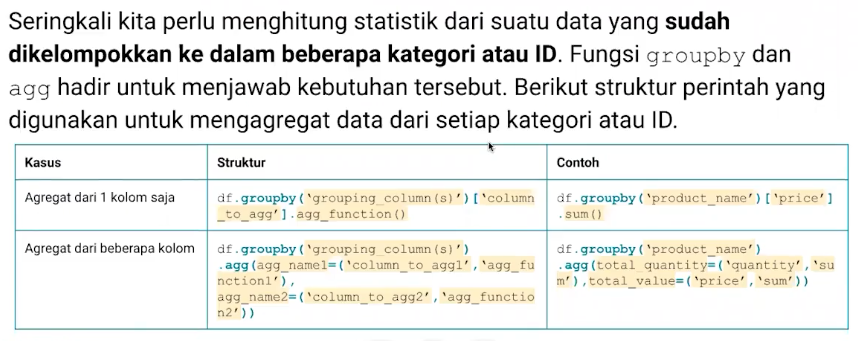



## Agregat dari 1 kolom saja

In [ ]:
# dengan 1 kolom sebagai grouping
df_clean.loc[df_clean['product_name'].str.contains('tea')].groupby('product_name')['quantity'].sum().sort_values(ascending=False)

,quantity
product_name,
60 teatime fairy cake cases,27584
antique silver tea glass etched,17190
moroccan tea glass,7218
antique silver tea glass engraved,6941
potting shed tea mug,6222
...,...
english rose tea set in gift box,5
light topaz teal/aqua col necklace,4
ceramic cake teapot with cherry,3


In [ ]:
df_clean.loc[df_clean['product_name'].str.contains('tea')].groupby('product_name', as_index=False)['quantity'].sum().sort_values('quantity', ascending=False)

,product_name,quantity
0,60 teatime fairy cake cases,27584
2,antique silver tea glass etched,17190
30,moroccan tea glass,7218
1,antique silver tea glass engraved,6941
35,potting shed tea mug,6222
...,...,...
17,english rose tea set in gift box,5
27,light topaz teal/aqua col necklace,4
10,ceramic cake teapot with cherry,3
13,dotcomgiftshop tea towel,2


In [ ]:
# agregat dengan lebih dari 1 kolom sebagai grouping
df_clean.loc[df_clean['product_name'].str.contains('tea')].groupby(['product_name','order_status'])['quantity'].sum().sort_values(ascending=False)

,,quantity
product_name,order_status,
60 teatime fairy cake cases,delivered,27432
antique silver tea glass etched,delivered,17083
moroccan tea glass,delivered,7129
antique silver tea glass engraved,delivered,6935
potting shed tea mug,delivered,6113
...,...,...
french chateau oval platter,cancelled,1
tea time mug in gift box,cancelled,1
tea time breakfast basket,cancelled,1


## Agregat dari beberapa kolom

In [ ]:
# dengan 1 kolom sebagai grouping
df_clean.loc[df_clean['product_name'].str.contains('tea')].groupby('product_name', as_index=False).agg(total_quantity=('quantity','sum'),total_amount=('amount','sum')).sort_values('total_quantity', ascending=False)

,product_name,total_quantity,total_amount
0,60 teatime fairy cake cases,27584,13885.20
2,antique silver tea glass etched,17190,23522.85
30,moroccan tea glass,7218,5744.56
1,antique silver tea glass engraved,6941,8272.97
35,potting shed tea mug,6222,7456.26
...,...,...,...
17,english rose tea set in gift box,5,23.25
27,light topaz teal/aqua col necklace,4,20.36
10,ceramic cake teapot with cherry,3,13.45
13,dotcomgiftshop tea towel,2,6.72


In [ ]:
# dengan lebih dari 1 kolom sebagai grouping
df_clean.loc[df_clean['product_name'].str.contains('tea')].groupby(['product_name','order_status'], as_index=False).agg(total_quantity=('quantity','sum'),total_amount=('amount','sum')).sort_values('total_quantity', ascending=False)

,product_name,order_status,total_quantity,total_amount
1,60 teatime fairy cake cases,delivered,27432,13806.15
5,antique silver tea glass etched,delivered,17083,23402.78
47,moroccan tea glass,delivered,7129,5669.51
3,antique silver tea glass engraved,delivered,6935,8265.47
55,potting shed tea mug,delivered,6113,7321.53
...,...,...,...,...
30,french chateau oval platter,cancelled,1,7.95
105,tea time mug in gift box,cancelled,1,2.95
97,tea time breakfast basket,cancelled,1,2.10
129,teatime round cake tins,cancelled,1,9.95
